Harmonic Oscillator: a_opt 0.4800, E0=0.4996 (exact 0.5)


/tmp/ipython-input-3671570571.py:66: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi2_ho /= np.trapz(psi2_ho, xs)


Hydrogen 1s: a_opt 0.4500, E0=-26.0504 (exact=-0.5)


/tmp/ipython-input-3671570571.py:93: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi2_h /= np.trapz(psi2_h, rs)


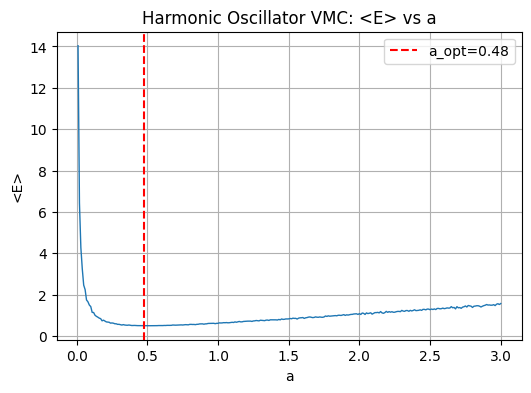

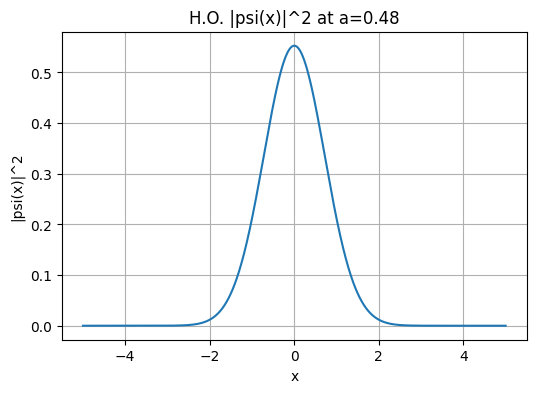

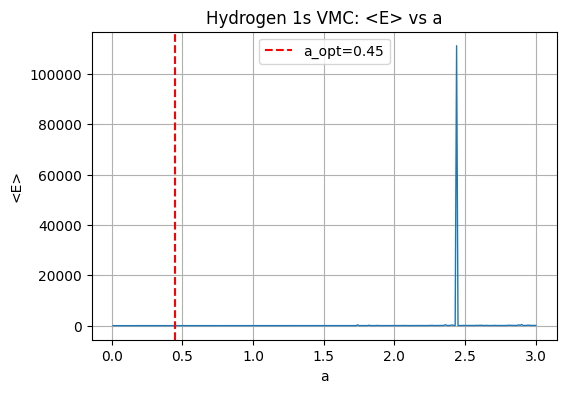

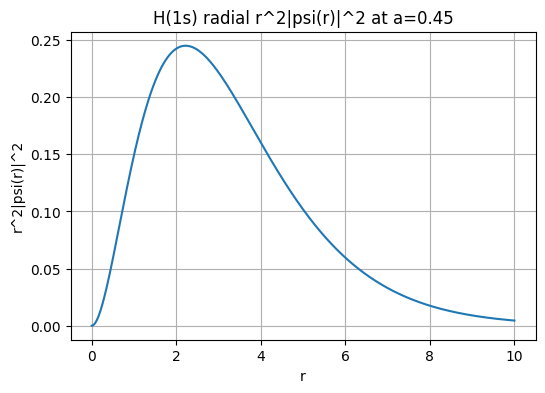

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Variational Monte Carlo for 1D Harmonic Oscillator
# Trial wavefunction: psi(x) = exp(-alpha * x^2)
# Local energy: E_L(x) = alpha + (0.5 - 2 * alpha**2) * x**2
# Metropolis sampling of exp(-2 * alpha * x^2)
def vmc_harmonic(alpha, n_steps, delta):
    x = 0.0
    energies = np.zeros(n_steps)
    for i in range(n_steps):
        x_prop = x + delta * (2 * np.random.rand() - 1)
        w = np.exp(-2 * alpha * (x_prop**2 - x**2))
        if w > 1 or np.random.rand() < w:
            x = x_prop
        energies[i] = alpha + (0.5 - 2 * alpha**2) * x**2
    burn = n_steps // 10
    return np.mean(energies[burn:])

# Variational Monte Carlo for Hydrogen 1s using radial sampling
# Trial wavefunction: psi(r) = exp(-alpha * r)
# Local energy: E_L(r) = -0.5 * alpha**2 + (alpha - 1) / r
def vmc_hydrogen(alpha, n_steps, delta):
    r = 1.0
    energies = np.zeros(n_steps)
    for i in range(n_steps):
        r_prop = r + delta * (2 * np.random.rand() - 1)
        if r_prop <= 0:
            # Handle boundary/non-physical moves
            energies[i] = energies[i-1] if i > 0 else 0
            continue
        else:
            w = np.exp(-2 * alpha * (r_prop - r))
            if w > 1 or np.random.rand() < w:
                r = r_prop
            energies[i] = -0.5 * alpha**2 + (alpha - 1) / r
    burn = n_steps // 10
    return np.mean(energies[burn:])

if __name__ == '__main__':
    # Parameters
    N_STEPS = 20000
    DELTA_HO = 1.0
    DELTA_H = 0.5
    alphas = np.linspace(0.01, 3.0, 300)

    # Harmonic Oscillator Analysis
    E_ho = [vmc_harmonic(a, N_STEPS, DELTA_HO) for a in alphas]
    idx_ho = np.argmin(E_ho)
    alpha_opt_ho, E0_ho = alphas[idx_ho], E_ho[idx_ho]
    print(f"Harmonic Oscillator: a_opt {alpha_opt_ho:.4f}, E0={E0_ho:.4f} (exact 0.5)")

    # Plot Harmonic Oscillator Energy vs Alpha
    plt.figure(figsize=(6,4))
    plt.plot(alphas, E_ho, linewidth=1)
    plt.axvline(alpha_opt_ho, color='r', linestyle='--', label=f'a_opt={alpha_opt_ho:.2f}')
    plt.title('Harmonic Oscillator VMC: <E> vs a')
    plt.xlabel('a')
    plt.ylabel('<E>')
    plt.legend()
    plt.grid(True)

    # Plot H.O. wavefunction squared at optimum alpha
    xs = np.linspace(-5, 5, 1000)
    psi2_ho = np.exp(-2 * alpha_opt_ho * xs**2)
    psi2_ho /= np.trapz(psi2_ho, xs)
    plt.figure(figsize=(6,4))
    plt.plot(xs, psi2_ho)
    plt.title(f'H.O. |psi(x)|^2 at a={alpha_opt_ho:.2f}')
    plt.xlabel('x')
    plt.ylabel('|psi(x)|^2')
    plt.grid(True)

    # Hydrogen 1s Atom Analysis
    E_h = [vmc_hydrogen(a, N_STEPS, DELTA_H) for a in alphas]
    idx_h = np.argmin(E_h)
    alpha_opt_h, E0_h = alphas[idx_h], E_h[idx_h]
    print(f"Hydrogen 1s: a_opt {alpha_opt_h:.4f}, E0={E0_h:.4f} (exact=-0.5)")

    # Plot Hydrogen Energy vs Alpha
    plt.figure(figsize=(6,4))
    plt.plot(alphas, E_h, linewidth=1)
    plt.axvline(alpha_opt_h, color='r', linestyle='--', label=f'a_opt={alpha_opt_h:.2f}')
    plt.title('Hydrogen 1s VMC: <E> vs a')
    plt.xlabel('a')
    plt.ylabel('<E>')
    plt.legend()
    plt.grid(True)

    # Plot Hydrogen radial probability density at optimum alpha
    rs = np.linspace(0, 10, 1000)
    psi2_h = rs**2 * np.exp(-2 * alpha_opt_h * rs)
    psi2_h /= np.trapz(psi2_h, rs)
    plt.figure(figsize=(6,4))
    plt.plot(rs, psi2_h)
    plt.title(f'H(1s) radial r^2|psi(r)|^2 at a={alpha_opt_h:.2f}')
    plt.xlabel('r')
    plt.ylabel('r^2|psi(r)|^2')
    plt.grid(True)

    plt.show()